# EDSA Regression Project

### Project Title: Impact of Agri-food related emmisions on Climate Change - Regression Project.
#### Done By: Erich du Plessis

© ExploreAI 2024

---

## Table of Contents

<a id="cont"></a>

<a href=#INT>1. Introduction</a>

<a href=#packages>2. Importing Packages</a>

<a href=#Data>3. Loading Data </a>

<a href=#Cleaning>4. Data Cleaning and Pre-Processing</a>

<a href=#EDA>5. Exploratory Data Analysis (EDA)</a>

<a href=#Feature>6. Feature Engineering</a>

<a href=#Model>7. Model Training and Testing </a>

---
 <a id="BC"></a>
## **Introduction**
<a href=#cont>Back to Table of Contents</a>

---

This regression project requires us to analyse and predict the effect of CO2 emmisions from the agri-food sector on climate change. We will be using a comprehensive dataset compiled by the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC). From this dataset we will train regression models to predict the average temperature variations based on multiple factors and emmision sources linked to the agri-food sector.
We will use our insights gained and ML models to provide recommendations and sollutions to climate change related discussions and issues from the agri-food sector.<br>

**<ins>Regression Models:</ins><br>**
In this exercise we will train and test 4 regression models on the included dataset:
1. Linear Regression Model
2. Multilinear Regression Model
3. Decision Tree Regression Model
4. Random Forest Regression Model

**<ins>Data Library:</ins><br>**
The dataset includes information on various agri-food sector related emmision sources and highlights their contribution towards climate change.
- Savanna fires: Emissions from fires in savanna ecosystems.
- Forest fires: Emissions from fires in forested areas.
- Crop Residues: Emissions from burning or decomposing leftover plant material after crop harvesting.
- Rice Cultivation: Emissions from methane released during rice cultivation.
- Drained organic soils (CO2): Emissions from carbon dioxide released when draining organic soils.
- Pesticides Manufacturing: Emissions from the production of pesticides.
- Food Transport: Emissions from transporting food products.
- Forestland: Land covered by forests.
- Net Forest conversion: Change in forest area due to deforestation and afforestation.
- Food Household Consumption: Emissions from food consumption at the household level.
- Food Retail: Emissions from the operation of retail establishments selling food.
- On-farm Electricity Use: Electricity consumption on farms.
- Food Packaging: Emissions from the production and disposal of food packaging materials.
- Agrifood Systems Waste Disposal: Emissions from waste disposal in the agrifood system.
- Food Processing: Emissions from processing food products.
- Fertilizers Manufacturing: Emissions from the production of fertilizers.
- IPPU: Emissions from industrial processes and product use.
- Manure applied to Soils: Emissions from applying animal manure to agricultural soils.
- Manure left on Pasture: Emissions from animal manure on pasture or grazing land.
- Manure Management: Emissions from managing and treating animal manure.
- Fires in organic soils: Emissions from fires in organic soils.
- Fires in humid tropical forests: Emissions from fires in humid tropical forests.
- On-farm energy use: Energy consumption on farms.
- Rural population: Number of people living in rural areas.
- Urban population: Number of people living in urban areas.
- Total Population - Male: Total number of male individuals in the population.
- Total Population - Female: Total number of female individuals in the population.
- Total_emission: Total greenhouse gas emissions from various sources.
- Average Temperature °C: The average increasing of temperature (by year) in degrees Celsius.

CO2 is measured in kilotonnes (kt).<br>
The average temperature will be our response / target variable and indicates the change in the average yearly temperature.<br>

---
 <a id="packages"></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

---

In [5]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

---
 <a id="Data"></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

---

In [7]:
# Load the dataset and store it in a pandas DataFrame
df_raw = pd.read_csv('co2_emissions_from_agri.csv')

---
 <a id="Cleaning"></a>
## **Data Cleaning and Pre-Processing**
<a href=#cont>Back to Table of Contents</a>

---

**<ins>Data:</ins>**<br>

In [10]:
# View the first 4 rows of the dataset to get familiar with the data
df_raw.head(4)

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917


There are 31 columns in the dataset with emmision information from various sources in different regions and years. The dataset also contains the change in the average temperature as well as population metrics.

In [12]:
# Determine the number of total observations, countries and years
obs = len(df_raw)
countries = df_raw['Area'].nunique()
years = df_raw['Year'].nunique()

# Display the metrics calculated
print(f'Total Observations in the Dataset: {obs}')
print(f'Number of Areas: {countries}')
print(f'Number of Years: {years}')

Total Observations in the Dataset: 6965
Number of Areas: 236
Number of Years: 31


In [13]:
# View the different features and data types
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

Most variables are numeric while only the area variable contains string data. 

<br>

**<ins>Data Formatting:</ins>**<br>

In [17]:
# Replace spaces in the column names with underscores to maintain a consistent naming convention
df_raw.columns = df_raw.columns.str.replace(' ','_')
df_raw.columns

Index(['Area', 'Year', 'Savanna_fires', 'Forest_fires', 'Crop_Residues',
       'Rice_Cultivation', 'Drained_organic_soils_(CO2)',
       'Pesticides_Manufacturing', 'Food_Transport', 'Forestland',
       'Net_Forest_conversion', 'Food_Household_Consumption', 'Food_Retail',
       'On-farm_Electricity_Use', 'Food_Packaging',
       'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
       'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
       'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
       'Fires_in_humid_tropical_forests', 'On-farm_energy_use',
       'Rural_population', 'Urban_population', 'Total_Population_-_Male',
       'Total_Population_-_Female', 'total_emission',
       'Average_Temperature_°C'],
      dtype='object')

<br>

**<ins>Duplicate Observations:</ins>**<br>

In [20]:
# Count the number of duplicated observations
df_raw.duplicated().sum()

0

There are no duplicate observations in the dataset.

<br>

**<ins>Outlier Analysis:</ins>**<br>
We will first view basic descriptive statistics (5 number summary) to identify any potential outliers or strange values that could skew the patterns identified by the regression models.

In [24]:
# Summary statistics for the first 10 rows
df_raw.loc[:, 'Year':'Net_Forest_conversion'].describe()

,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Net_Forest_conversion
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06


In [25]:
# Summary statistics for the next 10 rows
df_raw.loc[:, 'Food_Household_Consumption':'Manure_left_on_Pasture'].describe()

,Food_Household_Consumption,Food_Retail,On-farm_Electricity_Use,Food_Packaging,Agrifood_Systems_Waste_Disposal,Food_Processing,Fertilizers_Manufacturing,IPPU,Manure_applied_to_Soils,Manure_left_on_Pasture
count,6492.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.222000e+03,6037.000000,6965.000000
mean,4847.580384,2043.210539,1626.681460,1658.629808,6018.444633,3872.724461,3035.723356,1.999150e+04,923.225603,3518.026573
std,25789.143619,8494.249260,9343.182193,11481.343725,22156.742542,19838.216846,11693.029064,1.114209e+05,3226.992039,9103.556202
min,0.000000,0.000000,0.000000,0.000000,0.340000,0.000100,0.001900,0.000000e+00,0.049000,0.000700
25%,11.399950,26.818500,8.037600,67.631366,86.680500,209.587728,360.358799,3.903153e+01,16.303000,139.669900
50%,155.471100,172.042600,29.120700,74.018133,901.275700,344.760200,1115.052400,8.037066e+02,120.443900,972.567400
75%,1377.151950,1075.999100,499.944700,281.791000,3006.442100,1236.913400,2024.869900,6.155175e+03,460.120200,2430.792600
max,466288.200700,133784.065300,165676.299000,175741.306100,213289.701600,274253.512500,170826.423300,1.861641e+06,34677.360300,92630.756800


In [26]:
# Summary statistics for the remaining rows
df_raw.loc[:, 'Manure_Management':].describe()

,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
count,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


It is difficult to identify outliers through the summary statistics, especially given that we have many different features to look through. Therefore, we are going to use the IQR method to identify potential outliers.

In [28]:
def outlier_ident(dataframe_input):
    '''
    Identifies data values that meet the outlier criteria in a specific column.
    
    This function uses the following outlier criteria: 
    1) Outlier_Value < Q1 - 1.5 * IQR
    2) Outlier_Value > Q3 + 1.5 * IQR

    Args:
    dataframe_input = Pandas Dataframe

    Return:
    a) Prints the count of outliers in every column
    b) Outlier values in a list for each column
    '''

    for col in dataframe_input:
        count = 0
        outlier_list = []
        
        Q1 = np.quantile(dataframe_input[dataframe_input[col] != 0][col], 0.25)
        Q3 = np.quantile(dataframe_input[dataframe_input[col] != 0][col], 0.75)
        IQR = Q3 - Q1

        for x in dataframe_input[col]:
            if (x > Q3 + 1.5 * IQR) or (x < Q1 - 1.5 * IQR):
                count += 1
                outlier_list.append(x)
            else:
                pass

        print(f'{col} = {count}')

In [29]:
# Run the function and identify any potential outliers
outlier_ident(df_raw.loc[:, 'Year':])

Year = 0
Savanna_fires = 0
Forest_fires = 0
Crop_Residues = 0
Rice_Cultivation = 911
Drained_organic_soils_(CO2) = 464
Pesticides_Manufacturing = 842
Food_Transport = 890
Forestland = 0
Net_Forest_conversion = 0
Food_Household_Consumption = 0
Food_Retail = 871
On-farm_Electricity_Use = 917
Food_Packaging = 1357
Agrifood_Systems_Waste_Disposal = 1028
Food_Processing = 851
Fertilizers_Manufacturing = 778
IPPU = 0
Manure_applied_to_Soils = 0
Manure_left_on_Pasture = 911
Manure_Management = 0
Fires_in_organic_soils = 47
Fires_in_humid_tropical_forests = 0
On-farm_energy_use = 0
Rural_population = 719
Urban_population = 996
Total_Population_-_Male = 826
Total_Population_-_Female = 858
total_emission = 1142
Average_Temperature_°C = 155


The IQR method has identified a lot of potential outliers. The problem we are faced with is that we are dealing with areas across the globe that could differ significantly due to regional climates, geography, natural resources and industrial and farming activities. Without an in depth understanding of the data, we can't simply remove or alter data because it seems like some are outliers when it could be possible that the data accurately represents the trends and magnitudes observed in reality.

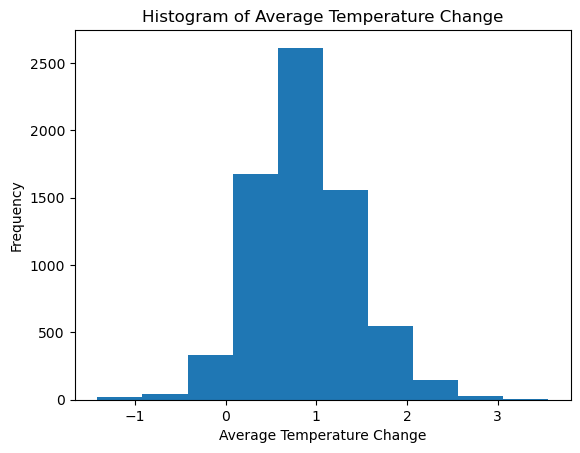

In [31]:
# View the Target Variable distribution to identify potential outliers
df_raw['Average_Temperature_°C'].plot.hist()
plt.title('Histogram of Average Temperature Change')
plt.xlabel('Average Temperature Change')
plt.show()

There are no signs of outliers being present even though the IQR method identified 155 cases. The target variable exhibits a normal distribution with a median around 1 degree change.

In [33]:
# Identify the observation with the max Male Population
index = df_raw['Total_Population_-_Male'].argmax()
df_raw.loc[index, :]

Area                                      China
Year                                       2020
Savanna_fires                          163.8876
Forest_fires                           603.8159
Crop_Residues                        33490.0741
Rice_Cultivation                    149256.6625
Drained_organic_soils_(CO2)           3916.9002
Pesticides_Manufacturing                 8525.0
Food_Transport                       40641.4559
Forestland                         -651765.3001
Net_Forest_conversion                       0.0
Food_Household_Consumption          466288.2007
Food_Retail                         133784.0653
On-farm_Electricity_Use              90812.7922
Food_Packaging                      174770.5565
Agrifood_Systems_Waste_Disposal     210913.1157
Food_Processing                     190706.7592
Fertilizers_Manufacturing           136078.8907
IPPU                               1861640.6626
Manure_applied_to_Soils              27778.7258
Manure_left_on_Pasture               539

The listed male population in China for 2020 is 743 million which matches the actual population in 2020 according to web sources. Again, the population is not an outlier but merely representitive of the region under consideration.

In [35]:
# Identify the observation with the min Male Population
index = df_raw['Total_Population_-_Male'].argmin()
df_raw.loc[index, :]

Area                                   Holy See
Year                                       2019
Savanna_fires                               NaN
Forest_fires                                NaN
Crop_Residues                               NaN
Rice_Cultivation                    9649.123125
Drained_organic_soils_(CO2)                 0.0
Pesticides_Manufacturing              11.481085
Food_Transport                        26.262663
Forestland                                  0.0
Net_Forest_conversion                       0.0
Food_Household_Consumption               0.0089
Food_Retail                              0.1213
On-farm_Electricity_Use              112.135517
Food_Packaging                        67.631366
Agrifood_Systems_Waste_Disposal       65.072347
Food_Processing                      451.196291
Fertilizers_Manufacturing           2357.644701
IPPU                                     0.5461
Manure_applied_to_Soils                     NaN
Manure_left_on_Pasture              6168

Similarly to the previous case, the population of holy see in 2019 was reported to be around 536 which matches back to this dataset and is representitive of the small jurisdiction being considered. We also expect emmision levels to be much lower in these types of regions and does not necessarily indicate inaccurate outliers.<br>

To reduce the impact of outliers, we will remove observations that could potentially be extreme outliers. This will hopefully retain the general trends while minimising the impact of extreme outliers. We will remove the observations by applying a very relaxed IQR condition (+/- 3.5 IQR) to mimimise the loss of observations. We will also exclude population metrics as this will be removed later on.

In [37]:
# Identify the indices of the outliers
index_set = set()

for col in df_raw.loc[:, 'Year':'On-farm_energy_use']:
        
    Q1 = np.quantile(df_raw[df_raw[col] != 0][col], 0.25)
    Q3 = np.quantile(df_raw[df_raw[col] != 0][col], 0.75)
    IQR = Q3 - Q1

    for i, x in enumerate(df_raw[col]):
        if math.isnan(x):
            continue
        elif (x > Q3 + 3.5 * IQR) or (x < Q1 - 3.5 * IQR):
            index_set.add(i)
        else:
            continue

len(index_set)

1864

We are going to remove 1864 observations, meaning that we will have 5101 remaining.

In [39]:
# Remove the outliers
df_raw = df_raw.drop(index_set, axis = 0)

# Reset DatFrame index
df_raw = df_raw.reset_index(drop = True)
df_raw

,Area,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
5097,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
5098,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
5099,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [40]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5101 entries, 0 to 5100
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             5101 non-null   object 
 1   Year                             5101 non-null   int64  
 2   Savanna_fires                    5101 non-null   float64
 3   Forest_fires                     5101 non-null   float64
 4   Crop_Residues                    4056 non-null   float64
 5   Rice_Cultivation                 5101 non-null   float64
 6   Drained_organic_soils_(CO2)      5101 non-null   float64
 7   Pesticides_Manufacturing         5101 non-null   float64
 8   Food_Transport                   5101 non-null   float64
 9   Forestland                       4693 non-null   float64
 10  Net_Forest_conversion            4693 non-null   float64
 11  Food_Household_Consumption       4833 non-null   float64
 12  Food_Retail         

<br>

**<ins>Missing Data:</ins>**<br>

In [43]:
# Determine the percentage of null entries in each feature
percent_missing = df_raw.isna().sum() * 100 / len(df_raw)

# Include only features with null entries present and round the percentage to 2 decimals
round(percent_missing,2).sort_values(ascending = False)[lambda x: x > 0]

Crop_Residues                 20.49
On-farm_energy_use            12.78
Manure_Management             11.57
Manure_applied_to_Soils       11.57
IPPU                           9.76
Forestland                     8.00
Net_Forest_conversion          8.00
Food_Household_Consumption     5.25
dtype: float64

There are a couple of features that have missing entries with Crop Residues having over 1300 missings. Before we address the missing value, we first have to understand how the missing values are distributed and whether they are systematic or random.<br>

We will now visualise how many missing entries there for each country, split by the different features listed above. This will tell us more about where the missing entries are and how many are missing for each area.

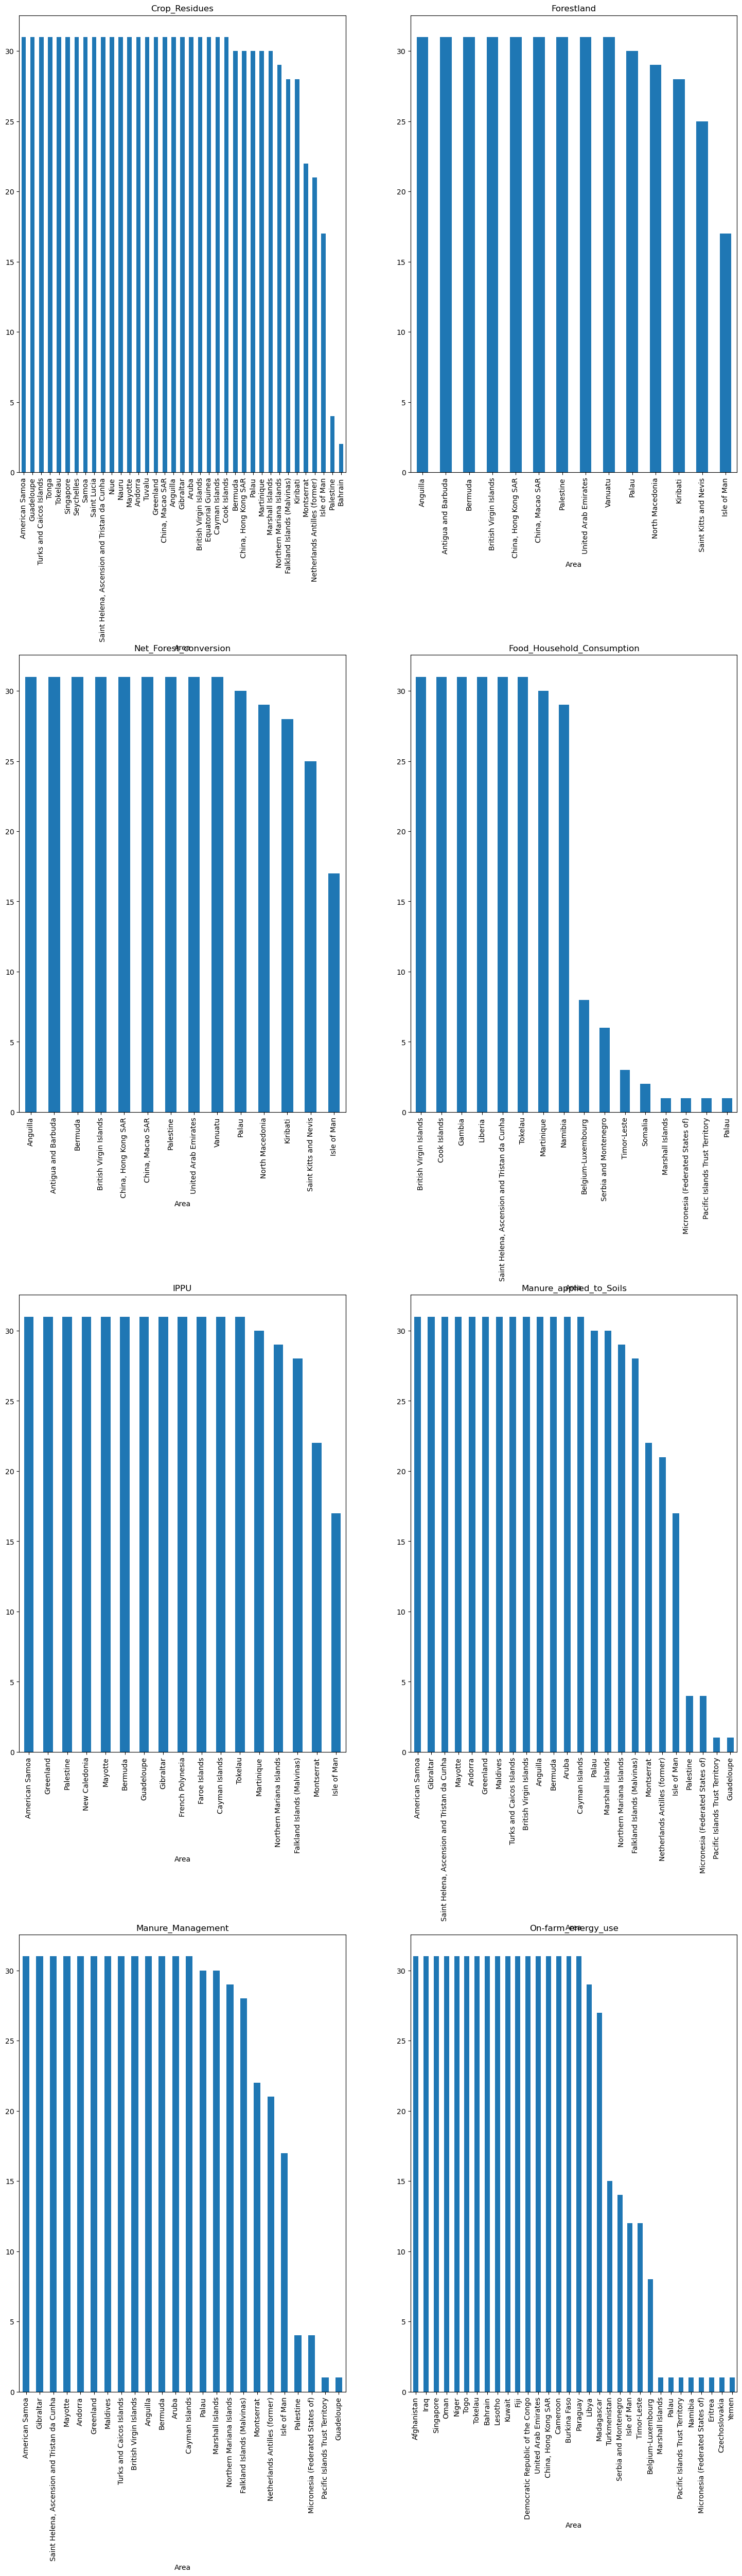

In [45]:
# Initiate the lists that will contain the series objects with the missing count of each area by feature
bar_list = []
feature_list = []
counter = 0

# Calculate and save the missing count for each filter, split by area
for feature in percent_missing[lambda x: x > 0].index:
    a = df_raw[df_raw[feature].isna()]['Area'].value_counts()
    bar_list.append(a)
    feature_list.append(feature)
    counter += 1

# Define the plot area that will be used to visualise the missing count distribution by area
fig, axes = plt.subplots(int(np.ceil(counter/2)), 2, figsize = (18,60))
fig.subplots_adjust(hspace = 0.4)
ax = axes.ravel()

# Plot bar graphs of the missing count by area and feature
for i in np.arange(0,counter):
    bar_list[i].plot.bar(ax = ax[i])
    ax[i].set_title(feature_list[i])

plt.show()

The bar graphs clearly show that in the majority of cases there are 31 missing entries per area. Since this is the same as the total number of observations we excpect for each area (Number of years included in the data), it means that there is no data available for that specific emmision source or feature in those countries. As a result, we can't use a simple mean / mode / median imputation from the countries to fill these missings. We could potentially use the mean or median from all countries combined, but this will likely result in incorrect data as not all areas are the same and are usually influenced by economical, political, social and geographical factors.<br>

We can consider three different approaches to treat the missing values and compare model performance from the three datasets:

1. Feature Deletion: We delete all columns that contain missing values to prevent them from influencing the regression models and also prevent the introduction of bias through imputation.
   
2. KNN Imputation: We use KNN (K-Nearest Neighbour) imputation to predict the missing values. KNN imputation is a method that predicts missing values based on similar data points in the entire dataset. This means that existing relationships between features are preserved instead of applying an arbitrary mean imputation. This is therefore a from of predictive imputation. (For more information: https://www.geeksforgeeks.org/python-imputation-using-the-knnimputer/)

3. Deletion and KNN Imputation: Here we delete columns with more than 10% missing values and impute the remaining missing values. This combination should benefit from both techniques where less bias is introduced from imputation while still maintaining feature relationships and more data points compared to full deletion.

For simplicity, we will apply deletion and KNN imputation to hopefully get the best of both techniques. We will drop columns with more than 8% missing values and impute the remaining variables.

<ins>KNN Imputation and Deletion:</ins>

In [48]:
# Drop columns with more than 8% missing
df_dropped = df_raw.drop(percent_missing[lambda x: x > 8].index, axis = 1)
df_dropped

,Area,Year,Savanna_fires,Forest_fires,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Net_Forest_conversion,...,Fertilizers_Manufacturing,Manure_left_on_Pasture,Fires_in_organic_soils,Fires_in_humid_tropical_forests,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
0,Afghanistan,1990,14.7237,0.0557,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,...,11.997000,1590.5319,0.0,0.0,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,...,12.853900,1657.2364,0.0,0.0,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,...,13.492900,1653.5068,0.0,0.0,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,...,14.055900,1642.9623,0.0,0.0,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,...,15.126900,1689.3593,0.0,0.0,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,Zimbabwe,2016,1190.0089,232.5068,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,...,2585.080847,2721.1459,0.0,0.0,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
5097,Zimbabwe,2017,1431.1407,131.1324,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,...,1227.240253,2744.8763,0.0,0.0,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
5098,Zimbabwe,2018,1557.5830,221.6222,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,...,1127.687805,2790.0949,0.0,0.0,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
5099,Zimbabwe,2019,1591.6049,171.0262,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,...,2485.528399,2828.7215,0.0,0.0,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [49]:
# Initiate the imputer object
imputer = KNNImputer(n_neighbors=5)

# Perform the imputation and save the new dataframa
df_imputed = pd.DataFrame(imputer.fit_transform(df_dropped.loc[0:,'Year':]), columns = df_dropped.loc[0:,'Year':].columns)

# Add the Area variable back and convert year to int
df_cleaned = pd.concat([df_dropped[['Area']], df_imputed], ignore_index=False, sort=False, axis = 1)
df_cleaned['Year'] = df_cleaned['Year'].map(lambda x: int(x))

df_cleaned.isna().sum()

Area                               0
Year                               0
Savanna_fires                      0
Forest_fires                       0
Rice_Cultivation                   0
Drained_organic_soils_(CO2)        0
Pesticides_Manufacturing           0
Food_Transport                     0
Forestland                         0
Net_Forest_conversion              0
Food_Household_Consumption         0
Food_Retail                        0
On-farm_Electricity_Use            0
Food_Packaging                     0
Agrifood_Systems_Waste_Disposal    0
Food_Processing                    0
Fertilizers_Manufacturing          0
Manure_left_on_Pasture             0
Fires_in_organic_soils             0
Fires_in_humid_tropical_forests    0
Rural_population                   0
Urban_population                   0
Total_Population_-_Male            0
Total_Population_-_Female          0
total_emission                     0
Average_Temperature_°C             0
dtype: int64

We now have a cleaned dataset that does not contain any missing values or duplicates and the data types are still in float and int format. The area feature is still in string format but will later be encoded into a numerical format that the regression models can interperet.

---
 <a id="EDA"></a>
## **Exploratory Data Analysis**
<a href=#cont>Back to Table of Contents</a>

---

We will perform EDA to better understand the data, data structure and feature relationships. We will then use these insights to perform feature engineering that will seek to optimise our modelling process and model performance.

**<ins>Cleaned Data Set:</ins>**<br>

In [54]:
df_cleaned.head()

,Area,Year,Savanna_fires,Forest_fires,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Net_Forest_conversion,...,Fertilizers_Manufacturing,Manure_left_on_Pasture,Fires_in_organic_soils,Fires_in_humid_tropical_forests,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
0,Afghanistan,1990,14.7237,0.0557,686.00,0.0,11.807483,63.1152,-2388.803,0.0,...,11.9970,1590.5319,0.0,0.0,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,678.16,0.0,11.712073,61.2125,-2388.803,0.0,...,12.8539,1657.2364,0.0,0.0,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,686.00,0.0,11.712073,53.3170,-2388.803,0.0,...,13.4929,1653.5068,0.0,0.0,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,686.00,0.0,11.712073,54.3617,-2388.803,0.0,...,14.0559,1642.9623,0.0,0.0,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,705.60,0.0,11.712073,53.9874,-2388.803,0.0,...,15.1269,1689.3593,0.0,0.0,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


<br>

**<ins>Data Distributions:</ins>**<br>

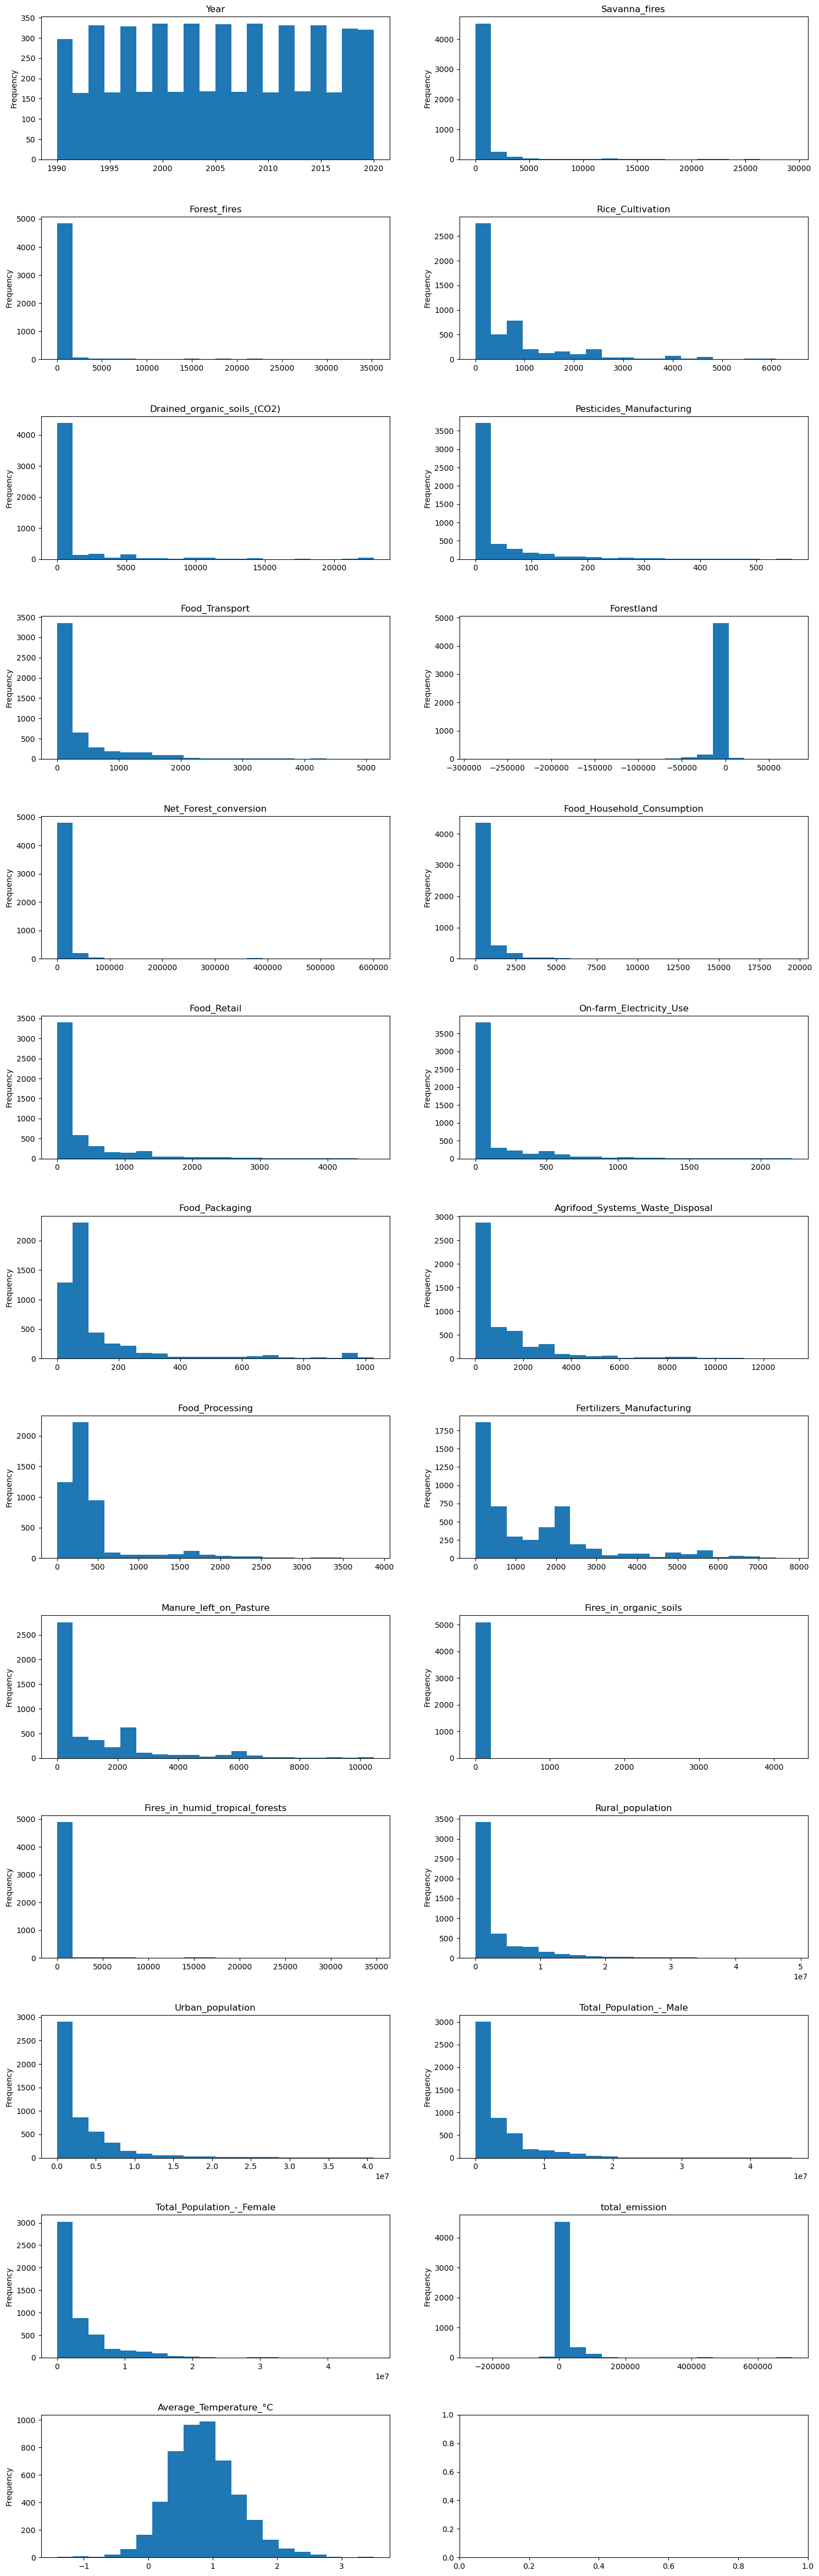

In [60]:
# Initiate the plot area
fig, axes = plt.subplots(13, 2, figsize = (18,60))
fig.subplots_adjust(hspace = 0.4)
ax = axes.ravel()

# Plot histograms for the remaining features
for i, feature in enumerate(df_cleaned.loc[:, 'Year':].columns):
    df_cleaned[feature].plot.hist(bins = 20, ax = ax[i])
    ax[i].set_title(feature)

plt.show()

The data distributions show that some excesively high values are still included in the dataset. The volumes of these outliers seem to be low and we will minimise the impact of them through data scaling later on.

<br>

**<ins>Feature Relationships:</ins>**<br>
The number of features makes it impractical to generate pairplots with all variables and therefore we can't visualise the relationships between all features simultaneously. We however need to ensure that the predictor variable do not exhibit linear relationships with each other. Colinearity means that we can't isolate the influence of a variable which is a key factor of linear regression analysis. To address this, we will drop features that are highly correlated with each other for linear regression.

**<ins>Correlation Analysis:</ins>**<br>

In [62]:
# Calculating the linear correlation coefficients
correlation_matrix = df_cleaned.loc[:, 'Year':].corr()
correlation_with_target = correlation_matrix['Average_Temperature_°C'].sort_values(ascending = False)

# Display the correlation coefficients with the target variable
print(f'Correlation of features with Average Temperature Change: {correlation_with_target}')

Correlation of features with Average Temperature Change: Average_Temperature_°C             1.000000
Year                               0.547040
Food_Retail                        0.242846
Food_Transport                     0.201456
Food_Packaging                     0.141944
Food_Processing                    0.139967
Food_Household_Consumption         0.130746
Urban_population                   0.125415
Drained_organic_soils_(CO2)        0.094477
Pesticides_Manufacturing           0.074145
Agrifood_Systems_Waste_Disposal    0.061790
On-farm_Electricity_Use            0.058105
Total_Population_-_Male            0.052107
Total_Population_-_Female          0.050863
Fires_in_organic_soils             0.006147
total_emission                    -0.015509
Rural_population                  -0.016691
Net_Forest_conversion             -0.030794
Fires_in_humid_tropical_forests   -0.037802
Rice_Cultivation                  -0.042676
Forest_fires                      -0.044542
Manure_left_on_Past

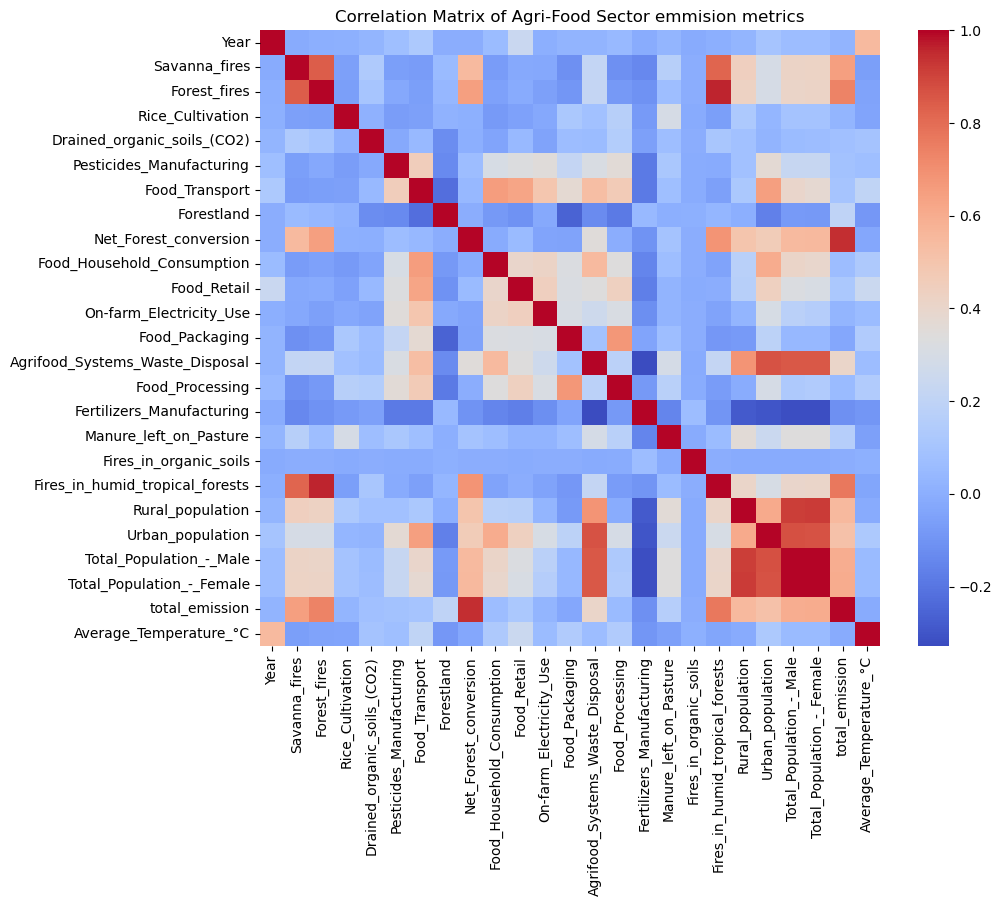

In [64]:
# Visualise the correlation coefficients with a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = False, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Matrix of Agri-Food Sector emmision metrics')
plt.show()

We can see that most predictor variables are not linearly correlated with the target variable. Only the year column shows a decent correlation with the target variable. We do however observe some colinearity in the dataset. Colinearity is detrimental to linear regression models as the predictor variables can't independently predict the value of the dependent variable.

**<ins>Removing Colinear features:</ins>**<br>

In [66]:
# Set pandas settings to show all columns
pd.set_option("display.max_columns", None)

# View Correlation Matrix where thecorr coefficient > 0.7
correlation_matrix[abs(correlation_matrix) > 0.7]

,Year,Savanna_fires,Forest_fires,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Net_Forest_conversion,Food_Household_Consumption,Food_Retail,On-farm_Electricity_Use,Food_Packaging,Agrifood_Systems_Waste_Disposal,Food_Processing,Fertilizers_Manufacturing,Manure_left_on_Pasture,Fires_in_organic_soils,Fires_in_humid_tropical_forests,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
Year,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Savanna_fires,NaN,1.000000,0.843559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.821575,NaN,NaN,NaN,NaN,NaN,NaN
Forest_fires,NaN,0.843559,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.958676,NaN,NaN,NaN,NaN,0.737730,NaN
Rice_Cultivation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drained_organic_soils_(CO2),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pesticides_Manufacturing,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Food_Transport,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Forestland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Net_Forest_conversion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946223,NaN
Food_Household_Consumption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To reduce the degree of colinearity in the dataset, we will remove features that are highly correlated. We will also drop the population metrics as we want to understand the direct relationship between the emmision sources and the average temperature. Based on the matrix above, we will remove the following features:


The number of variables has been significantly decreased but should reduce the negative impact of colinearity.

In [ ]:
# List of columns to drop
drop_columns = ['Rural_population','Urban_population','Total_Population_-_Male','Total_Population_-_Female',
                'Fires_in_humid_tropical_forests','Manure_left_on_Pasture','Crop_Residues','Agrifood_Systems_Waste_Disposal',
                'Food_Packaging','Food_Processing','Fertilizers_Manufacturing','IPPU','Manure_Management']

# Drop columns
df_imputation = df_imputation.drop(drop_columns, axis = 1)
df_imputation

In [ ]:
df_imputation

---
 <a id="Feature"></a>
## **Feature Engineering**
<a href=#cont>Back to Table of Contents</a>

---

---
 <a id="Model"></a>
## **Model Training and Testing**
<a href=#cont>Back to Table of Contents</a>

---